<a href="https://colab.research.google.com/github/EmanSalah2000/linear_regression_Multivariable/blob/main/linear_regression_Multivariable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install  streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


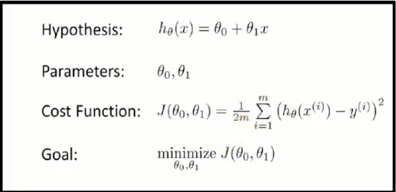

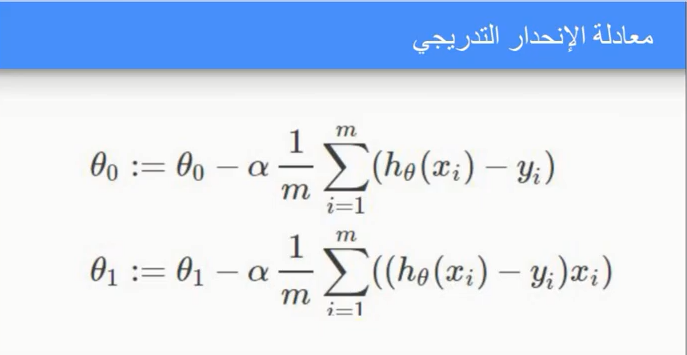

# **code without streamlit**

Text(0.5, 1.0, 'error profit vs training epochs')

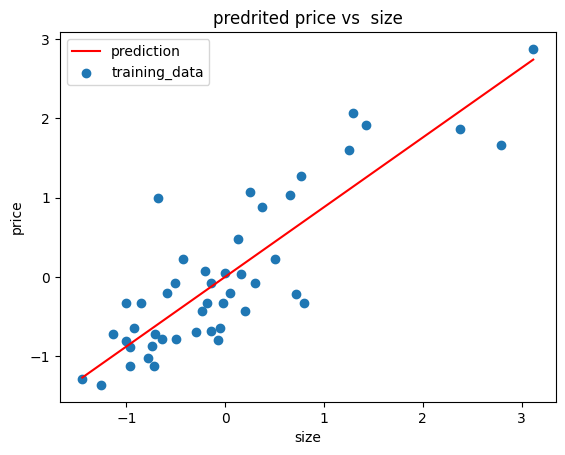

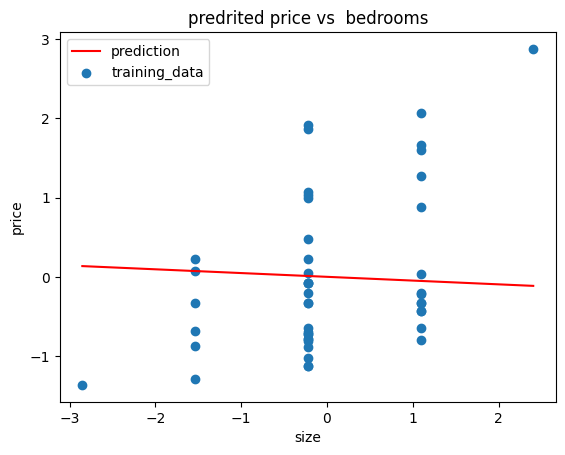

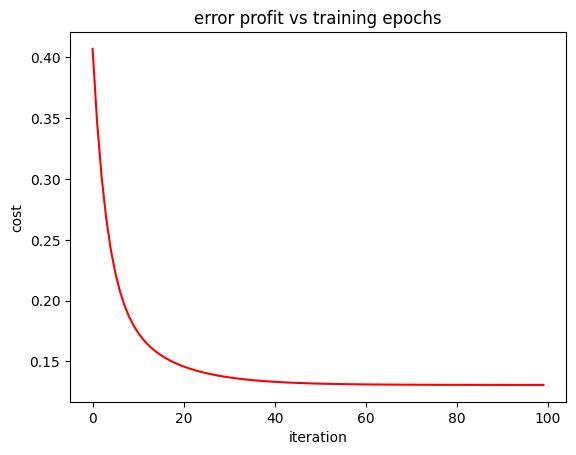

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def  calc_cost(X,y, theta):  
  z = np.power(((X * theta.T) - y), 2)
  return  np.sum(z) / (2 * len(X))


#gradient_descent
def gradient_descent(X , y , theta , alpha , iteration):
  temp = np.matrix(np.zeros(theta.shape)) # (1,2)
  param = int(theta.ravel().shape[1]) # the sphape 1 of temp   ravel make the 2d array in one list
  cost = np.zeros(iteration) # h(x) after each iteration == num of iteration
 
  for i in range(iteration):
      error = (X*theta.T)-y
      for j in range(param):
        term= np.multiply(error , X[:,j]) # to multiply each variable  with x 
        temp[0,j]= theta[0,j] - ((alpha/len(X))*np.sum(term))
      theta=temp
      cost[i]=calc_cost(X,y,theta)
  return theta , cost



path="/content/linear_regression_multivariable.txt"
data=pd.read_csv(path,header=None ,names=['Size','bedrooms','price'])
# data.head(10)
# data.describe()
# rescale data after describe   all data  -1 --> 1   data normalization
data = (data- data.mean())/data.std()
# data.describe()


# # add 1's column in the first
data.insert(0,'ones',1) # (where , name , value)
# second seprate data to x and y
colum_num=data.shape[1] # rows   columns            in this example   (47,4)

X=data.iloc[:,:colum_num-1]
y=data.iloc[:,colum_num-1:]

# X.head(10)
# y.head(10)

X=np.matrix(X.values);
y=np.matrix(y.values);
theta=np.matrix(np.array([0,0,0]))

# print(X.shape)
# print(y.shape)
# print(theta.shape)
alpha=0.1
iteration=100

new_theta , cost = gradient_descent(X,y, theta ,alpha , iteration)

# get best fit line between size and price 
var = np.linspace(data.Size.min(),data.Size.max(),100) # min  max    separate 100 parts
line = new_theta[0,0]+new_theta[0,1]*var

fig, ax = plt.subplots()
ax.plot(var , line , 'r', label="prediction") # r red
ax.scatter(data.Size,data.price, label="training_data")
ax.legend(loc=2)
ax.set_xlabel("size")
ax.set_ylabel("price")
ax.set_title("predrited price vs  size")


# get best fit line between bedrooms and price 
var = np.linspace(data.bedrooms.min(),data.bedrooms.max(),100) # min  max    separate 100 parts
line = new_theta[0,0]+new_theta[0,2]*var

fig, ax = plt.subplots()
ax.plot(var , line , 'r', label="prediction") # r red
ax.scatter(data.bedrooms,data.price, label="training_data")
ax.legend(loc=2)
ax.set_xlabel("size")
ax.set_ylabel("price")
ax.set_title("predrited price vs  bedrooms")


fig, ax = plt.subplots()
ax.plot(np.arange(int(iteration)) , cost , 'r') # r red
ax.set_xlabel("iteration")
ax.set_ylabel("cost")
ax.set_title("error profit vs training epochs")

# **code with stream lit**

In [3]:
%%writefile app.py

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import streamlit as st

def  calc_cost(X,y, theta):  
  z = np.power(((X * theta.T) - y), 2)
  return  np.sum(z) / (2 * len(X))


#gradient_descent
def gradient_descent(X , y , theta , alpha , iteration):
  temp = np.matrix(np.zeros(theta.shape)) # (1,2)
  param = int(theta.ravel().shape[1]) # the sphape 1 of temp   ravel make the 2d array in one list
  cost = np.zeros(iteration) # h(x) after each iteration == num of iteration
 
  for i in range(iteration):
      error = (X*theta.T)-y
      for j in range(param):
        term= np.multiply(error , X[:,j]) # to multiply each variable  with x 
        temp[0,j]= theta[0,j] - ((alpha/len(X))*np.sum(term))
      theta=temp
      cost[i]=calc_cost(X,y,theta)
  return theta , cost



def run_code():
    path="/content/linear_regression_multivariable.txt"
    data=pd.read_csv(path,header=None ,names=['Size','bedrooms','price'])
    # data.head(10)
    # data.describe()
    # rescale data after describe   all data  -1 --> 1   data normalization
    data = (data- data.mean())/data.std()
    # data.describe()
    temp_data=data
    # # add 1's column in the first
    data.insert(0,'ones',1) # (where , name , value)
    # second seprate data to x and y
    colum_num=data.shape[1] # rows   columns            in this example   (47,4)

    X=data.iloc[:,:colum_num-1]
    y=data.iloc[:,colum_num-1:]

    # X.head(10)
    # y.head(10)

    X=np.matrix(X.values);
    y=np.matrix(y.values);
    theta=np.matrix(np.array([0,0,0]))
    # print(X.shape)
    # print(y.shape)
    # print(theta.shape)

    return temp_data,X,y,theta



st.title("linear_regression_Multivariable")
with st.form("linear_regression_Multivariable"):#,clear_on_submit=True
     alpha = st.text_input("Enter Alpha")
     iteration = st.text_input("Num Of  iteration")
     submit = st.form_submit_button("Submit")
     if submit :
        data ,X , y , theta = run_code()
        new_theta , Cost = gradient_descent(X , y , theta , float(alpha) , int(iteration))

        st.text("New_theta")
        st.write(new_theta)
        st.text("Cost")
        st.write(calc_cost(X,y,new_theta))

        # get best fit line between size and price 
        var = np.linspace(data.Size.min(),data.Size.max(),100) # min  max    separate 100 parts
        line = new_theta[0,0]+new_theta[0,1]*var

       
        st.text("fit line between size and price")
        fig, ax = plt.subplots()
        ax.plot(var , line , 'r', label="prediction") # r red
        ax.scatter(data.Size,data.price, label="training_data")
        ax.legend(loc=2)
        ax.set_xlabel("size")
        ax.set_ylabel("price")
        ax.set_title("predrited price vs  size")
        st.pyplot(fig)

        # get best fit line between bedrooms and price 
        var = np.linspace(data.bedrooms.min(),data.bedrooms.max(),100) # min  max    separate 100 parts
        line = new_theta[0,0]+new_theta[0,2]*var

        st.text("fit line between bedrooms and price ")
        fig, ax = plt.subplots()
        ax.plot(var , line , 'r', label="prediction") # r red
        ax.scatter(data.bedrooms,data.price, label="training_data")
        ax.legend(loc=2)
        ax.set_xlabel("size")
        ax.set_ylabel("price")
        ax.set_title("predrited price vs  bedrooms")
        st.pyplot(fig)
 
        st.text("error between cost and iteration ")
        fig, ax = plt.subplots()
        ax.plot(np.arange(int(iteration)) , Cost , 'r') # r red
        ax.set_xlabel("iteration")
        ax.set_ylabel("cost")
        ax.set_title("error profit vs training epochs")
        st.pyplot(fig)
















Overwriting app.py


In [4]:


import webbrowser
import platform
print(platform.system())
if platform.system() == 'Windows':
  webbrowser.open('http://streamlit.io ')
else:
  print('error')
# !streamlit hello
!streamlit run app.py & npx localtunnel --port 8501
     


Linux
error


npx: installed 22 in 2.23s

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.230.32.84:8501

your url is: https://heavy-pugs-yawn.loca.lt
  Stopping...
^C
